In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import os

from matplotlib import pyplot as plt; plt.rcParams['figure.figsize'] = 15, 5

DATA_DIR = '../data/interim/'
HDF_FILE = 'interim_data.hdf'

hdf = pd.HDFStore(DATA_DIR + HDF_FILE, mode = 'r')
D0 = hdf[hdf.keys()[-1]]
hdf.close()

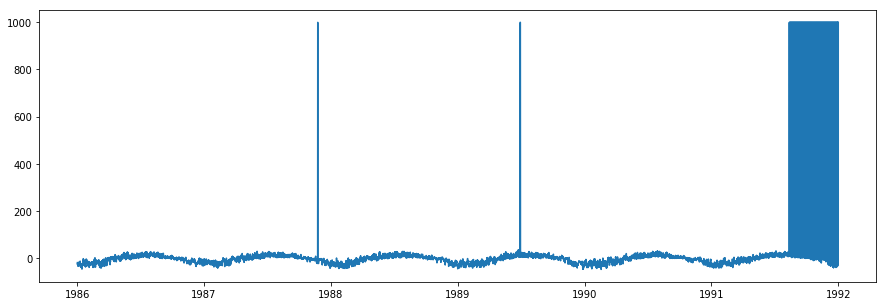

In [9]:
p = plt.plot(D0.index, D0['T'])

In [10]:
D = pd.DataFrame(D0, copy = True)

In [11]:
td = datetime.timedelta(days = 20)
i_miss = D.index[D['T_flag'] == - 1]
D.loc[i_miss, 'T'] = np.nan
D_interp = pd.DataFrame(D, copy = True)

In [12]:
%timeit D_interp.loc[:, 'T'] = D.loc[:, 'T'].interpolate(method = 'pchip', order = None, axis = 0, limit_direction = 'forward')

2 s ± 6.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit D_interp.to_hdf('test.hdf', key = '/test')

8.27 ms ± 70.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%timeit Dx = pd.read_hdf('test.hdf', key = '/test')

6.38 ms ± 81.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


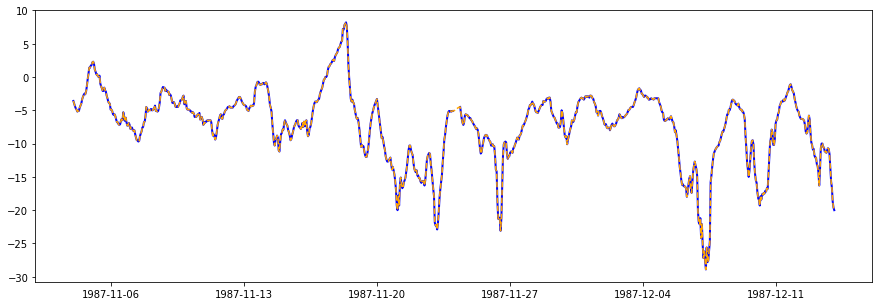

In [18]:
p = plt.plot(D.loc[i_miss[0] - td : i_miss[0] + td, 'T'], color = 'blue', linewidth = 2)
p = plt.plot(D_interp.loc[i_miss[0] - td : i_miss[0] + td, 'T'], color = 'orange', linestyle = '--')

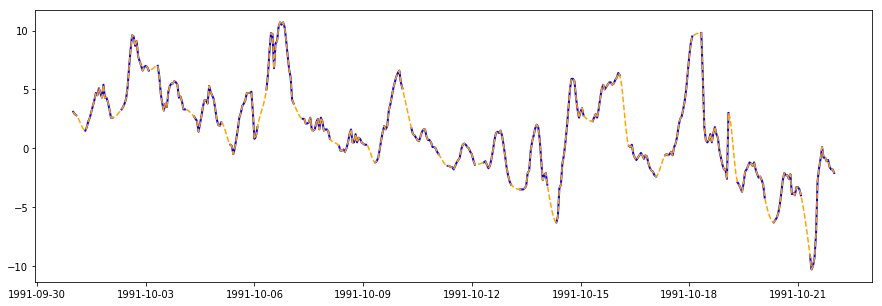

In [19]:
p = plt.plot(D.loc[datetime.datetime(1991, 10, 1):datetime.datetime(1991, 10,22), 'T'], color = 'blue', linewidth = 2)
p = plt.plot(D_interp.loc[datetime.datetime(1991, 10, 1):datetime.datetime(1991,10,22), 'T'], color = 'orange', linestyle = '--')

These interpolations look perfectly reasonable, but they don't use the statistics of the process.